In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import itertools
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Provide column names as they are not specified in the file
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'label'
]

# Read the file with specified column names and specify that the age-information is not(!) the index
df = pd.read_csv("adult.data", header=None, names=column_names, index_col = False)

# Take a first look at the data
display(df.head(15))
print(df.shape)
display(df.info())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

In [3]:
# The summary doesn't show missing values (all Non-Null Counts are equal to the number of rows given in .shape. 
# But from .head() we can see there are entries featuring '?'. Let's encode them with NaN for further analysis.
df.replace(['?', ' ?', '? ', '  ?  '], np.nan, inplace=True)

# See if there are missing values now. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# now we see that in the columns 'workclass', 'occupation', 'native-country' there are missing values. 
# as we don't want to throw away approx. 2000 data points, we can replace the missing values with the most common value (mode) as all three are categorical data
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# lets check again for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
label             0
dtype: int64

In [5]:
#Preprocessing

# split the df in the data and target label
df_target = df['label']
df_data = df.drop(columns = 'label')

# Preprocess the label - Using LabelEncoder
label_encoder = LabelEncoder()
df_target = label_encoder.fit_transform(df_target)
label_names = ['<=50k', ' >50k']
label_order=[0,1]

# classify the data features (data-type)
numeric_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week', 'education_num']
# we leave out the feature education - reason will follow 
categorical_features = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

''' Education would be a features we want to encode ordinally as the differences make a real sense
(bigger difference between Preschool and Masters as between Bachelor and Masters).
But there is a feature called 'education-num' that may already do that. Lets investigate further.'''

# verify if there is only one specific 'education-num'-value for each unique value of education
unique_combinations_count = df.groupby(['education', 'education_num']).size().reset_index(name='Count')
print(unique_combinations_count)

''' As we can see in the table below, there is just one combination for each of the two values.
Also the numeration is in the correct order (least education (1 - Preschool) to most education
(16 - Doctorate). So we don't need to encode it manually and drop the 'education' column due to 
redundant data.'''

df_data = df_data.drop(columns = 'education')

# now we can create our train and test split
data_train, data_test, target_train, target_test = train_test_split(
    df_data, df_target, test_size=0.2, random_state=42, stratify=df_target)

# now we can define our pipeline 

# first define a columnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# now pipeline with ColumnTransformer, Balancer (RandomOverSampler), and estimator - just an example!
pipeline = Pipeline([
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler()), 
    ('estimator', None)
])

# now create Folds for Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        education  education_num  Count
0            10th              6    933
1            11th              7   1175
2            12th              8    433
3         1st-4th              2    168
4         5th-6th              3    333
5         7th-8th              4    646
6             9th              5    514
7      Assoc-acdm             12   1067
8       Assoc-voc             11   1382
9       Bachelors             13   5355
10      Doctorate             16    413
11        HS-grad              9  10501
12        Masters             14   1723
13      Preschool              1     51
14    Prof-school             15    576
15   Some-college             10   7291


In [6]:
# Count the number of occurrences for each unique value in the 'sex' column
sex_counts = df['sex'].value_counts()

# Display the counts
print(sex_counts)

sex
 Male      21790
 Female    10771
Name: count, dtype: int64


In [7]:
# after preprocessing and prep, get a first impression on the performance of the classifiers
from imblearn.under_sampling import RandomUnderSampler

# as scorer we define recall
scoring_metric = 'recall'

# we want to test the models from the exercises with their basic parameters

# Create classifiers and save them in a list
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
classifier_to_test = [dt_classifier, knn_classifier]
names = ['DT',"KNN"]


# iterate and test
for name, classifier in zip(names, classifier_to_test): 
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', RandomUnderSampler()),
        ('estimator', classifier)
    ])   
    recall = cross_val_score(pipeline, data_test, target_test, cv=cv, scoring=scoring_metric)

    print(f'{name} Recall: {recall.mean()}')

DT Recall: 0.7621345745549567
KNN Recall: 0.8303323534215256


In [8]:
knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Number of neighbors to consider
    'estimator__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'estimator__p': [1, 2],  # Power parameter for the Minkowski distance
}
dt_param_grid = {
    'estimator__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'estimator__splitter': ['best', 'random'],  # Strategy for choosing the split at each node
    'estimator__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
param_grids = [dt_param_grid,knn_param_grid]

# define a list to save the best estimators
estimator_list = []

for name, classifier, params in zip(names, classifier_to_test, param_grids): 
    print(f"Working on {name}...")

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', RandomUnderSampler()),
        ('estimator', classifier)
    ])

    print("Setting up RandomizedSearchCV...")
    randomized_search_estimator = RandomizedSearchCV(pipeline, param_distributions=params, scoring=scoring_metric, cv=cv, random_state = 42)
    recall = cross_val_score(randomized_search_estimator, data_test, target_test, cv=cv, scoring=scoring_metric)
    
    estimator_list.append(randomized_search_estimator)

    print(f'{name} Recall after Hyperparameter-Tuning: {recall.mean()}')

Working on DT...
Setting up RandomizedSearchCV...
DT Recall after Hyperparameter-Tuning: 0.8482075779846481
Working on KNN...
Setting up RandomizedSearchCV...
KNN Recall after Hyperparameter-Tuning: 0.879462681691981


In [9]:
# write a function for analysis
from sklearn.calibration import calibration_curve

# copy function for confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# real analysis function

def evaluate_classification(y_true, y_pred, label_order = label_order):
    """
    Evaluate classification performance and return metrics.
    
    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels

    Returns:
    - none, only prints results and plots confusion matrix
    """
    # Calculate AUC
    auc = roc_auc_score(y_true, y_pred)
    
    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=1)

    # print metrics
    display(report)
    print(f'AUC: {auc}')
    # calculate confusion matrix and plot it
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    plot_confusion_matrix(cm, classes=label_names, title='Confusion Matrix')
    

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

def evaluation_precision_recall(y_true, y_prob):
    """
    Evaluate classification performance and return Precision-Recall curve.
    
    Parameters:
    - y_true: array-like, true labels
    - y_prob: array-like, predicted probabilities

    Returns:
    - none, only prints results and plots Precision-Recall curve
    """
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall, precision)

    # Create a plot for Precision-Recall curve
    plt.figure(figsize=(8, 8))

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.2f})')

    # Set labels and title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

   



Training started for DT


{'estimator__splitter': 'random',
 'estimator__min_samples_split': 2,
 'estimator__min_samples_leaf': 4,
 'estimator__max_depth': 10,
 'estimator__criterion': 'entropy'}

{'0': {'precision': 0.9443612774451098,
  'recall': 0.7654196157735086,
  'f1-score': 0.8455266391153803,
  'support': 4945.0},
 '1': {'precision': 0.5369261477045908,
  'recall': 0.857780612244898,
  'f1-score': 0.6604468450773385,
  'support': 1568.0},
 'accuracy': 0.787655458314141,
 'macro avg': {'precision': 0.7406437125748503,
  'recall': 0.8116001140092033,
  'f1-score': 0.7529867420963594,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8462715671068427,
  'recall': 0.787655458314141,
  'f1-score': 0.8009688136813792,
  'support': 6513.0}}

AUC: 0.8116001140092032


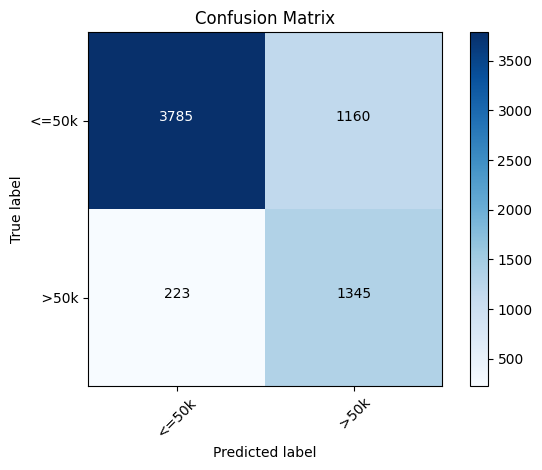


Training started for KNN


{'estimator__weights': 'distance',
 'estimator__p': 2,
 'estimator__n_neighbors': 21}

{'0': {'precision': 0.9490027770764958,
  'recall': 0.7601617795753286,
  'f1-score': 0.8441500112283853,
  'support': 4945.0},
 '1': {'precision': 0.5352664576802508,
  'recall': 0.8711734693877551,
  'f1-score': 0.6631067961165049,
  'support': 1568.0},
 'accuracy': 0.7868877629356671,
 'macro avg': {'precision': 0.7421346173783734,
  'recall': 0.8156676244815418,
  'f1-score': 0.7536284036724451,
  'support': 6513.0},
 'weighted avg': {'precision': 0.8493960599241371,
  'recall': 0.7868877629356671,
  'f1-score': 0.8005639892269376,
  'support': 6513.0}}

AUC: 0.8156676244815418


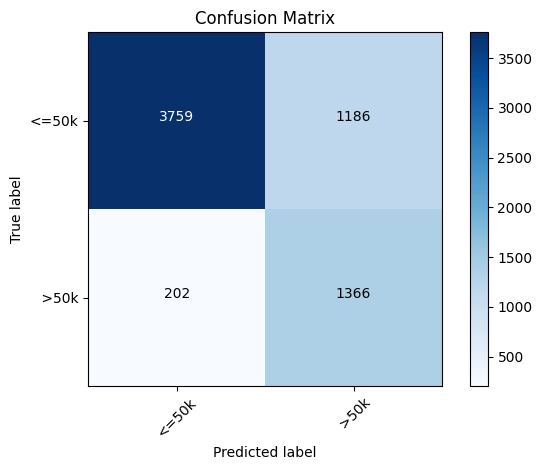

In [10]:
# evaluate all four best models

# create a list to save predictions
estimator_predictions = []


for randomized_search_estimator, name in zip(estimator_list, names):
    print(f'\nTraining started for {name}')
    randomized_search_estimator.fit(data_train, target_train)
    predictions = randomized_search_estimator.predict(data_test)
    estimator_predictions.append(predictions)
    display(randomized_search_estimator.best_params_)
    evaluate_classification(target_test, predictions)

